## Introduction
Today we're going to build linear regression, logistic regression, ridge regression and Naive Bayes using health related data. Struecture codes will be provided. Along the way, we'll play with some fun Python codes. By the end, we'll have completed a data science project from start to finish.

In [1]:
# View current directory
!pwd
# Step 1: Make a folder named session_10 under the class folder if you haven't created.
# !mkdir session10
# Make a folder named data under the session_10 if you haven't created.
# !mkdir data

/Users/pengning/Desktop/Bootcamp/session_10


In [2]:
# Step 2: Import packages and classes
# It is a good habit to install packages at the 
# beginning of the codes
import pandas  as pd # Data manipulation
import numpy as np # Data manipulation
from sklearn.linear_model import LinearRegression # Model building
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from matplotlib import style
from sklearn.metrics import mean_squared_error #Evaluation metrics
from sklearn.metrics import mean_absolute_error #Evaluation metrics
import statsmodels.api as sm
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Display the plot in notebook and make plots sorted
%matplotlib inline 

## Simple linear regression

In [3]:
# Download data to data folder
health_df_1 = pd.read_csv('./data/table501.txt', delimiter = ",")

In [4]:
# To double check whether table501.txt has been loaded succesfully and
# have a brief view on the data. 
# Always list part of the data and check if they make sense.
health_df_1.head()

,SBP,Age
0,144,39
1,138,45
2,145,47
3,162,65
4,170,67


In [5]:
# Extrac X (SBP) and Y (Age)
X = health_df_1.SBP
Y = health_df_1.Age
# Call .reshape() on x because this array is required to be two-dimensional
X = X.to_numpy().reshape(-1, 1)
Y = Y.to_numpy()

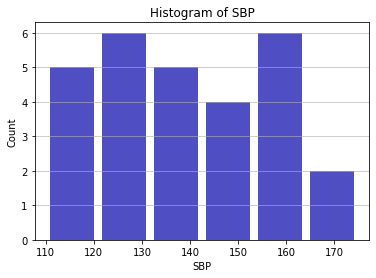

In [6]:
# Step 3: visualize the data
# Create a histogram with normal curve
# An "interface" to matplotlib.axes.Axes.hist() method
# Use funtion matplotlib.pyplot.hist(x, alpha=n)to plot histogram
n, bins, patches = plt.hist(x=X, # Dataset
                            bins='auto', 
                            color='#0504aa', 
                            alpha=0.7, # Transparency
                            rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SBP')
plt.ylabel('Count')
plt.title('Histogram of SBP')
plt.show()

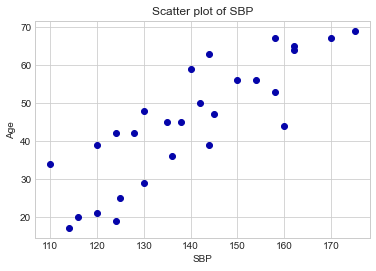

In [7]:
# Create a scatterplot to further visualice the relationship between
# SBP and Age
plt.style.use('seaborn-whitegrid')
plt.scatter(X, Y, color='#0504aa')
plt.xlabel('SBP')
plt.ylabel('Age')
plt.title('Scatter plot of SBP')
plt.show()

In [8]:
# Step 4: built linear regression model
# Create model
slr_model = LinearRegression()
slr_model.fit(X, Y)
intercept = slr_model.intercept_
slope = slr_model.coef_
print('intercept:', intercept)
print('slope:', slope)
y_pred = slr_model.predict(X)
# print('predicted response:', y_pred, sep='\n')
y_pred = intercept + slope * X

intercept: -59.85538876763905
slope: [0.75037069]


### Choose an evaluation metric
* We then need to compare these predictions with the actual result and measure them in some way.
* This is where the selection of evaluation metric is important. For regression, we measure the distance between the predicted and actual answers in some way. The shorter the distance, the more correct the model is. 
* We cover three common metrics below:
  * `Mean Absolute Error`: which provides a mean score for all the predicted versus actual values as an absolute value 
  * `Means Squared Error`: which provides a mean score for all the predicted versus actual values as a square of the absolute value
  * `R2`: which we recommend you research as an exercise to grow your knowledge. WIkipedia and `sklearn` document are a great place to start!


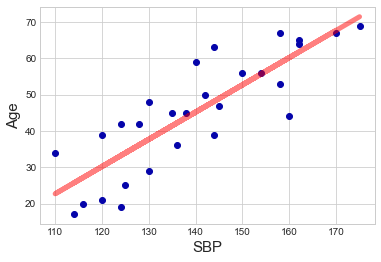

In [9]:
# Step 5: visualize regression
plt.xlabel('SBP', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.scatter(X, Y, color='#0504aa')
plt.plot(X, intercept + slope*X, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.show()

### Choose an evaluation metric
* We then need to compare these predictions with the actual result and measure them in some way.
* This is where the selection of evaluation metric is important. For regression, we measure the distance between the predicted and actual answers in some way. The shorter the distance, the more correct the model is. 
* We cover three common metrics below:
  * `Mean Absolute Error`: which provides a mean score for all the predicted versus actual values as an absolute value 
  * `Means Squared Error`: which provides a mean score for all the predicted versus actual values as a square of the absolute value
  * `R2`: the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

In [10]:
# Obtain the value of MSE 
MSE = mean_squared_error(Y, y_pred)
print('MSE:', MSE)
# Obtain the value of MAE 
MAE = mean_absolute_error(Y, y_pred)
print('MAE:', MAE)
# Obtain the value of 𝑅² using .score()
r_sq = slr_model.score(X, Y)
slope = slr_model.coef_
intercept = slr_model.intercept_
print('R squrare:', r_sq)

MSE: 69.67565944959195
MAE: 7.093106571052525
R squrare: 0.7122099509065329


## Part 1: Multiple linear regression

In [11]:
health_df_2 = pd.read_csv('./data/smoke.csv')
health_df_2.head()

,ID,Mother_age,Mother_smoking,Birth_weight
0,1,18,1.0,110
1,2,23,1.3,97
2,3,34,2.0,88
3,4,19,2.0,92
4,5,22,1.4,105


In [12]:
# pandas has a lot of functionality to assist with exploratory data analysis
# .describe() provide summary statistics on all numeric columns
print(health_df_2.describe())
# we can also see the shape of the data
print("\n The shape of dataset 2 is:", health_df_2.shape)

             ID  Mother_age  Mother_smoking  Birth_weight
count  20.00000   20.000000       20.000000      20.00000
mean   10.50000   24.900000        1.365000     103.00000
std     5.91608    6.290343        0.791584      27.25513
min     1.00000   16.000000        0.200000      22.00000
25%     5.75000   20.000000        0.775000      89.50000
50%    10.50000   22.500000        1.300000     102.50000
75%    15.25000   29.500000        2.000000     120.75000
max    20.00000   38.000000        3.000000     142.00000

 The shape of dataset 2 is: (20, 4)


In [13]:
X = health_df_2[['Mother_age', 'Mother_smoking']].to_numpy()
Y = health_df_2['Birth_weight'].to_numpy().reshape(-1, 1)

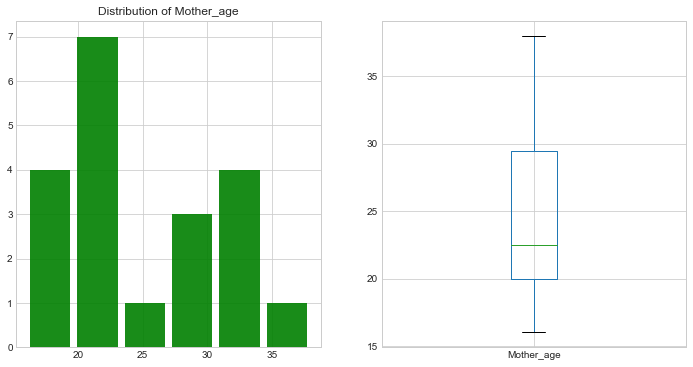

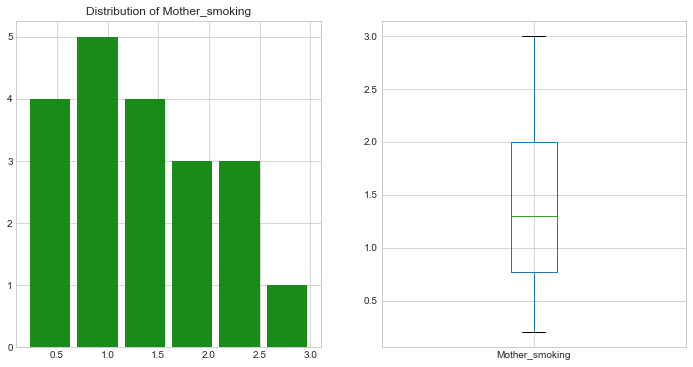

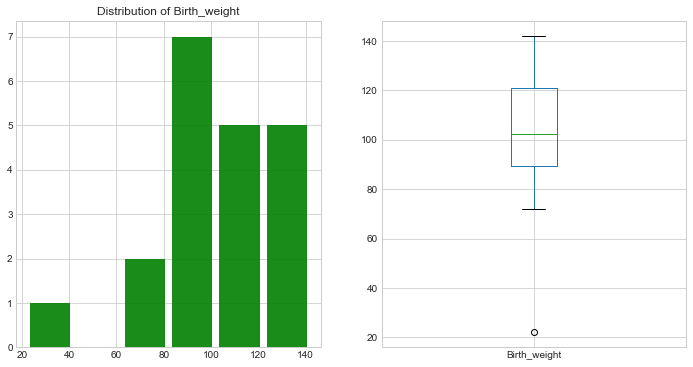

In [14]:
# we can build on this analysis by plotting the distribution and boxplots for each column
# 
# we loop through all the columns
for col in health_df_2.columns[1:]: # the first row is index, ignore
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    # our first chart is a histogram and we set the title 
    health_df_2[col].hist(bins='auto', color='g', alpha=0.9, rwidth=0.85, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    health_df_2.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

In [15]:
df_2 = health_df_2.drop('ID', axis=1)

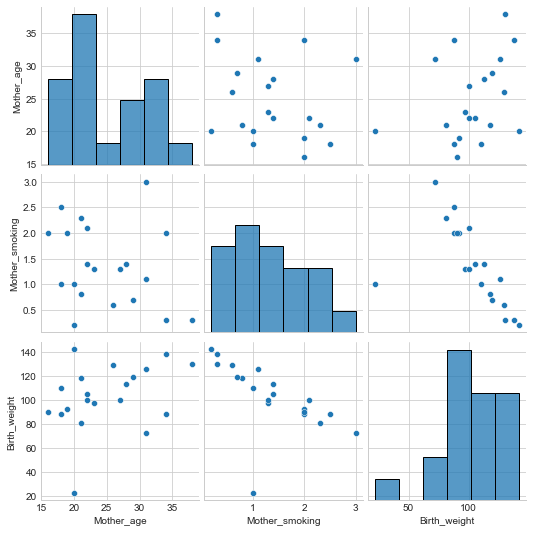

In [16]:
# Another way to gain insight from the relationship betwwen variables without
# using for loop
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.pairplot(df_2)
plt.savefig('pairplor_health_df_2.png')
plt.show()

In [17]:
# Split the data set into trianing and validation
X = df_2.drop("Birth_weight", axis = 1)
Y = df_2["Birth_weight"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
# Since Mother smoking has a strong negative relationship
# with birth weight, we test a slm first
slr = LinearRegression()
slr.fit(X_train["Mother_smoking"].to_numpy().reshape(-1, 1), y_train) # Dimension purpose
y_pred = slr.predict(X_test["Mother_smoking"].to_numpy().reshape(-1, 1))

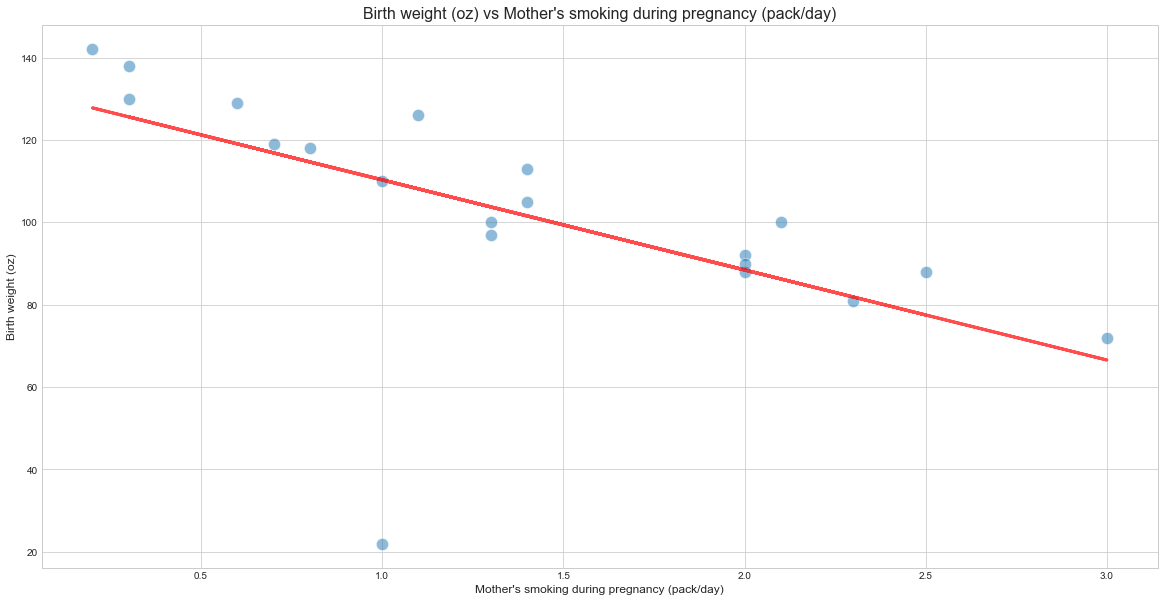

In [19]:
slr_slope = slr.coef_
slr_intercept = slr.intercept_

sns.scatterplot(x = 'Mother_smoking', 
                y = 'Birth_weight',
                data = df_2[["Mother_smoking", "Birth_weight"]],
                s = 150, 
                alpha = 0.5,
                edgecolor = 'white')
plt.plot(df_2["Mother_smoking"], slr_slope*df_2["Mother_smoking"] + slr_intercept, color = 'r', linewidth = 3, alpha=.7)
plt.title("Birth weight (oz) vs Mother's smoking during pregnancy (pack/day)", fontsize = 16)
plt.ylabel("Birth weight (oz)", fontsize = 12)
plt.xlabel("Mother's smoking during pregnancy (pack/day)", fontsize = 12)
plt.savefig('bw_ms_slrfit.png')
plt.show()

In [20]:
# Evaluate slr model
# Obtain the value of R square
print(cl("R-Squared :", attrs = ["bold"]),
      slr.score(X_test["Mother_smoking"].to_numpy().reshape(-1, 1),
                y_test))
# Obtain the value of MSE 
MSE = mean_squared_error(y_test, y_pred)
print(cl("MSE:", attrs = ["bold"]), MSE)
# Obtain the value of MAE 
MAE = mean_absolute_error(y_test, y_pred)
print(cl("MAE:", attrs = ["bold"]), MAE)

R-Squared : 0.886026509049755
MSE: 51.13848072073806
MAE: 6.767090395480231


## Part 2: Binary Logistic Regression
This part is modified from Harvard CS109A's lab 6 notebook:
https://harvard-iacs.github.io/2018-CS109A/labs/lab-6/student/

Linear regression is usually a good baseline model, but since the outcome we're trying to predict only takes values 0 and 1 we'll want to use logistic regression instead of basic linear regression.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [22]:
# Read-in and checking
oesophageal_df = pd.read_csv("data/oesophageal.csv", index_col=0)
# Please examine the first 6 rows of the dataset use method in previous 
# data checking process
oesophageal_df.head() # Leave this line blank for exercise

,alcohol,tobacco,case,freq
agegrp,,,,
1,0,1,0,40
1,0,2,0,10
1,0,3,0,6
1,0,4,0,5
1,0,1,1,0


In [23]:
# Please view the dataset summary matrix with the method in previous 
# data checking process
oesophageal_df.describe() # Leave this line blank for exercise

,alcohol,tobacco,case,freq
count,92.00000,92.000000,92.00000,92.000000
mean,0.50000,2.456522,0.50000,8.369565
std,0.50274,1.123310,0.50274,12.015299
min,0.00000,1.000000,0.00000,0.000000
25%,0.00000,1.000000,0.00000,1.000000
50%,0.50000,2.000000,0.50000,4.000000
75%,1.00000,3.000000,1.00000,10.000000
max,1.00000,4.000000,1.00000,60.000000


In [24]:
# Split the data set into trianing and validation
# Time to practise! Please separate the read-in data
# into training and testing sets
X = oesophageal_df.drop("case", axis = 1) # Leave this line blank for exercise
Y = oesophageal_df["case"] # Leave this line blank for exercise
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # Leave this line blank for exercise
# Double check whether you have successfully 
# separate training and testing sets
X_train.head()

,alcohol,tobacco,freq
agegrp,,,
2,1,3,1
3,1,2,17
4,0,3,3
1,0,3,0
3,1,4,2


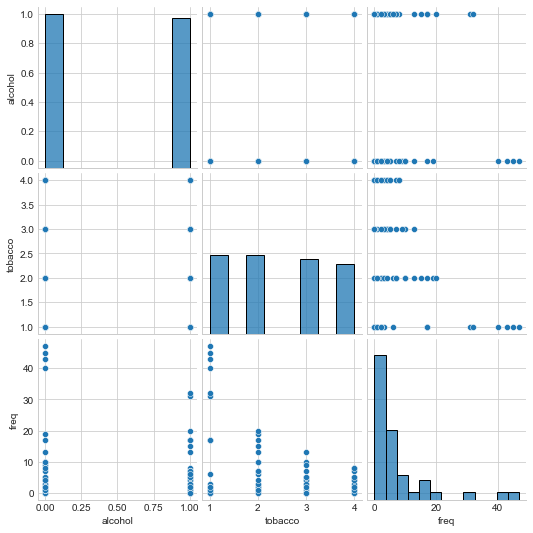

In [25]:
# Visualize your training data
# Leave following cell blank for exercise
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.pairplot(X_train)
plt.savefig('pairplor_oesophageal_df_X_train.png')
plt.show()

Model building part

We'll begin with statsmodels, because this package allow us to compute confidence intervals and check that coefficients make sense or not.

In [26]:
#‘lbfgs’ solver handles multinomial loss in multiclass problems 
logreg_model = LogisticRegression(solver='lbfgs', class_weight="balanced").fit(X_train, y_train)

In [27]:
y_preds_train = logreg_model.predict(X_train)
y_preds_test = logreg_model.predict(X_test)

full_logreg_score_train = accuracy_score(y_train, y_preds_train)
full_logreg_score_test = accuracy_score(y_test, y_preds_test)

# Evaluation
print('Training Set Score: {}'.format(full_logreg_score_train))
print('Test Set Score: {}'.format(full_logreg_score_test))

Training Set Score: 0.821917808219178
Test Set Score: 0.6842105263157895


(0.0, 1.0)

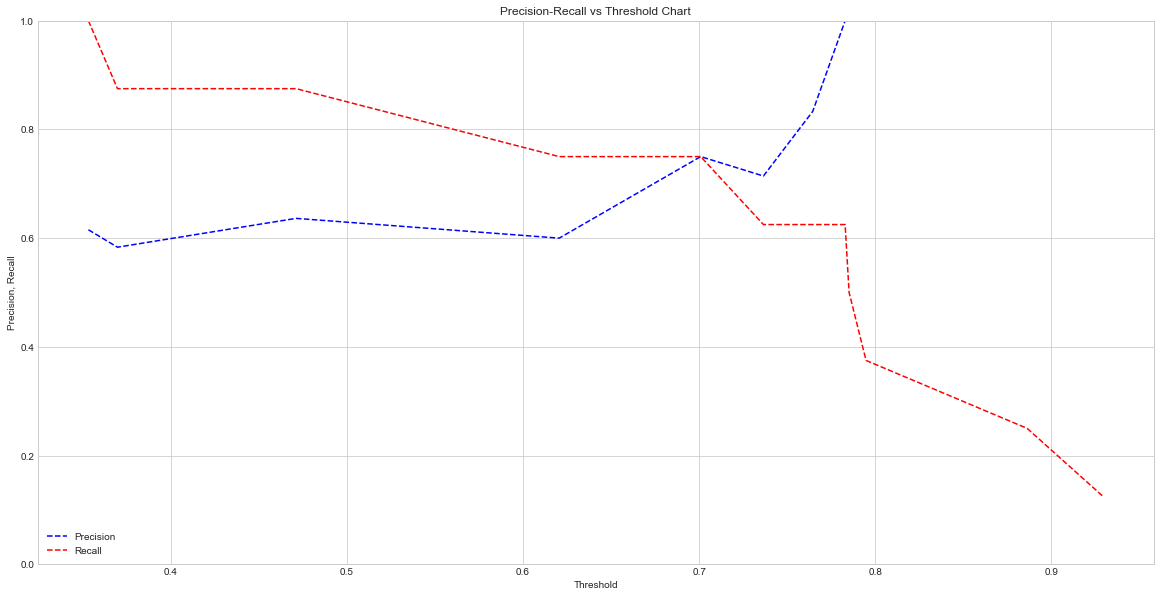

In [28]:
# probs_y is a 2-D array of probability of being labeled as
# 0 (first column of array) vs 1 (2nd column in array)
probs_y = logreg_model.predict_proba(X_test)
# Retrieve probability of being 1(in second column of probs_y)
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


In [29]:
# Get performance by class 
# Compute the confussion matrix
cnf_matrix = pd.crosstab(y_test, y_preds_test, rownames=['Actual'], colnames=['Predicted'])
# With margin
cnf_matrix_all = pd.crosstab(y_test, y_preds_test, margins=True, rownames=['Actual'], colnames=['Predicted'])
cnf_matrix_all

Predicted,0,1,All
Actual,,,
0,7,4,11
1,2,6,8
All,9,10,19


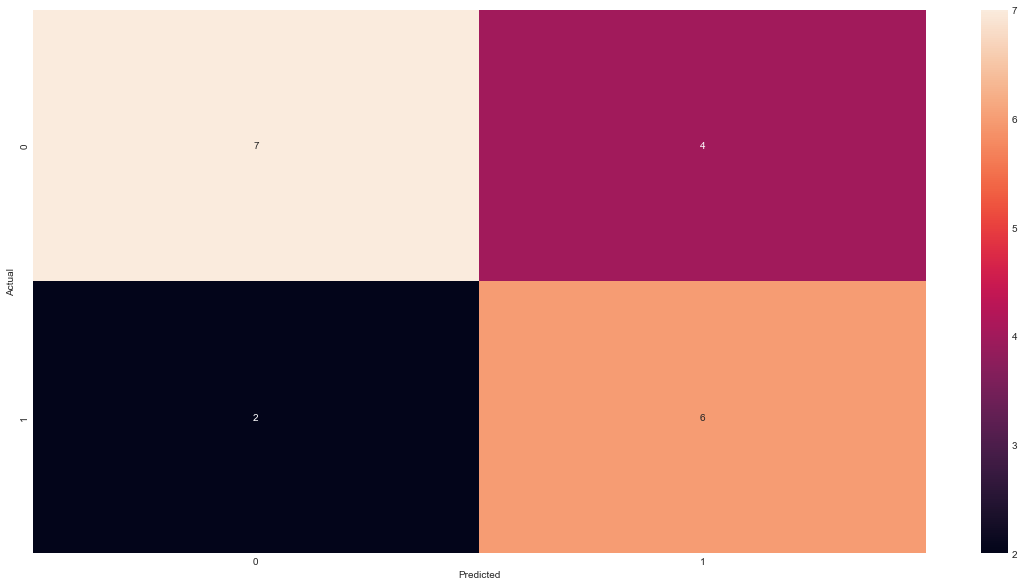

In [30]:
# Visualize matrix
sns.heatmap(cnf_matrix, annot = True)


As can be observed from the above matrix
TP = True Positives = 7 (upper left)

TN = True Negatives = 6 (lower right)

FP = False Positives = 4 (lower left)

FN = False Negatives = 2 (upperight)

You can then get the Accuracy using:

Accuracy = (TP+TN)/Total = (7+6)/19 = 1

The accuracy is therefore 68% for the test set.

In [31]:
# Another way to check the accuracy is shown below, 
# using accuracy_score() method.
accuracy_score(y_test, y_preds_test) 

0.6842105263157895

## Part 3: Ridge Regression
Ridge regression is a regression technique that is quite similar to unadorned least squares linear regression: simply adding an $\ell_2$ **penalty** on the parameters $\beta$ to the objective function for linear regression yields the objective function for ridge regression.

Our goal is to find an assignment to $\beta$ that minimizes the function

$$f(\beta) = \|X\beta - Y\|_2^2 + \lambda \|\beta\|_2^2,$$

where $\lambda$ is a hyperparameter and, as usual, $X$ is the training data and $Y$ the observations. In practice, we tune $\lambda$ until we find a model that generalizes well to the test data.

Ridge regression is an example of a **shrinkage method**: compared to least squares, it shrinks the parameter estimates in the hopes of **reducing variance and improving prediction accuracy**.

In [32]:
from IPython.display import Image
Image(url='https://newonlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson04/ridge_regression_geomteric/index.png')

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [34]:
framingham_df = pd.read_csv('./data/frmgham2.csv')

In [35]:
framingham_df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


## Clean data
The dataset contains a few unknown values.

In [36]:
framingham_df.isna().sum()

RANDID         0
SEX            0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
educ         295
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
TIME           0
PERIOD         0
HDLC        8600
LDLC        8601
DEATH          0
ANGINA         0
HOSPMI         0
MI_FCHD        0
ANYCHD         0
STROKE         0
CVD            0
HYPERTEN       0
TIMEAP         0
TIMEMI         0
TIMEMIFC       0
TIMECHD        0
TIMESTRK       0
TIMECVD        0
TIMEDTH        0
TIMEHYP        0
dtype: int64

To create a cleaner dataset, we will drop some columns and remove NaN values manually

In [37]:
framingham_df = framingham_df.dropna()
framingham_df.isna().sum()

RANDID      0
SEX         0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    0
GLUCOSE     0
educ        0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
PREVHYP     0
TIME        0
PERIOD      0
HDLC        0
LDLC        0
DEATH       0
ANGINA      0
HOSPMI      0
MI_FCHD     0
ANYCHD      0
STROKE      0
CVD         0
HYPERTEN    0
TIMEAP      0
TIMEMI      0
TIMEMIFC    0
TIMECHD     0
TIMESTRK    0
TIMECVD     0
TIMEDTH     0
TIMEHYP     0
dtype: int64

In [38]:
# We create a subdataset based on the previous one
# Split the data set into trianing and validation
X = framingham_df[["SEX", "AGE", "CURSMOKE",
                   "CIGPDAY", "BPMEDS", "PREVSTRK",
                   "PREVHYP", "DIABP", "TOTCHOL",
                   "BMI", "HEARTRTE", "GLUCOSE"]]
X.head()
Y = framingham_df["SYSBP"] 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [40]:
# Define ridge regression model
ridge_model = Ridge()
# Define model evaluation method
# Here we use a non-repeat cv
# For more about repeated cv:
# https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
cross_validation_1 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

In [41]:
# Define search
search = GridSearchCV(ridge_model, grid, scoring = 'neg_mean_absolute_error', cv = cross_validation_1, n_jobs = -1)
# Perform the search
fitted_ridge_model = search.fit(X_train, y_train)
# Summarize
print('MAE: %.3f' % fitted_ridge_model.best_score_)
print('Alpha: %s' % fitted_ridge_model.best_params_)
print('Best estimator: %s' % fitted_ridge_model.best_estimator_)
print("Coefficients of best model: %s" % fitted_ridge_model.best_estimator_.coef_)

MAE: -10.133
Alpha: {'alpha': 0.99}
Best estimator: Ridge(alpha=0.99)
Coefficients of best model: [ 2.15885975e+00  7.26427307e-01 -3.01462440e+00  1.21537758e-01
  4.61237776e+00 -1.95629757e-01  1.23308470e+01  1.06550086e+00
  1.01670466e-02 -1.18114409e-01 -2.97610019e-02  6.11025500e-02]


In [42]:
# Make a prediction
y_pred = fitted_ridge_model.best_estimator_.predict(X_test)

Model evaluation

In [43]:
# Obtain the value of MSE 
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)
# Obtain the value of MAE 
MAE = mean_absolute_error(y_test, y_pred)
print('MAE:', MAE)

MSE: 178.12883692527365
MAE: 10.210016750548728


## Part 4: Naive Bayes
reference:

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb#scrollTo=-NJHDvC9xpc-

To better visualize and understand the model, we use simulation data in this section.
We are going to simulate data by ourselves and build model on them.
First, we generate data from simple Gaussian distribution.

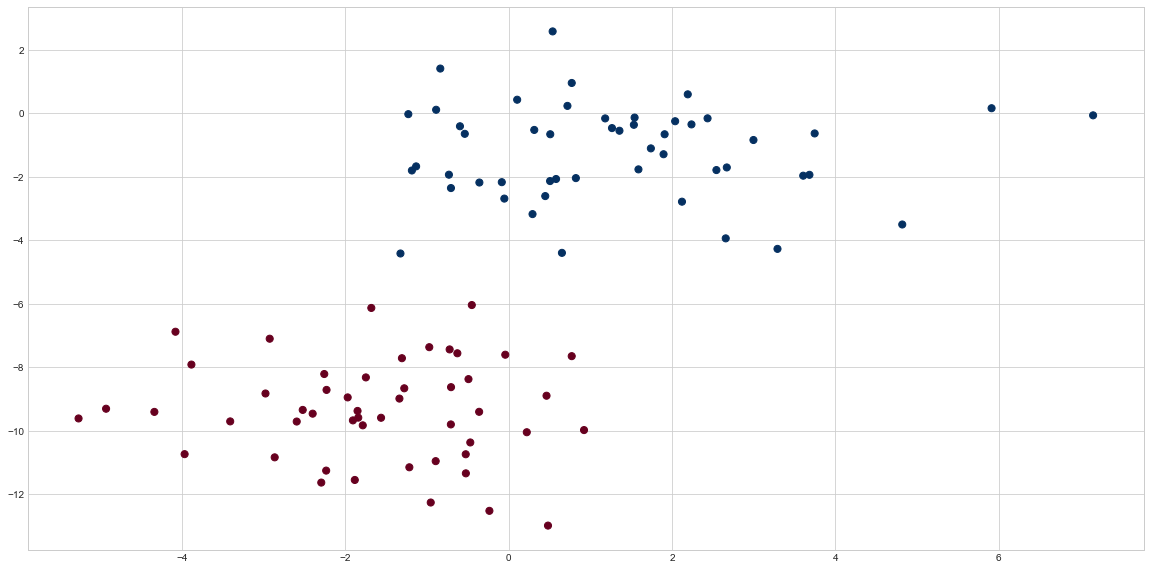

In [44]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
plt.show()

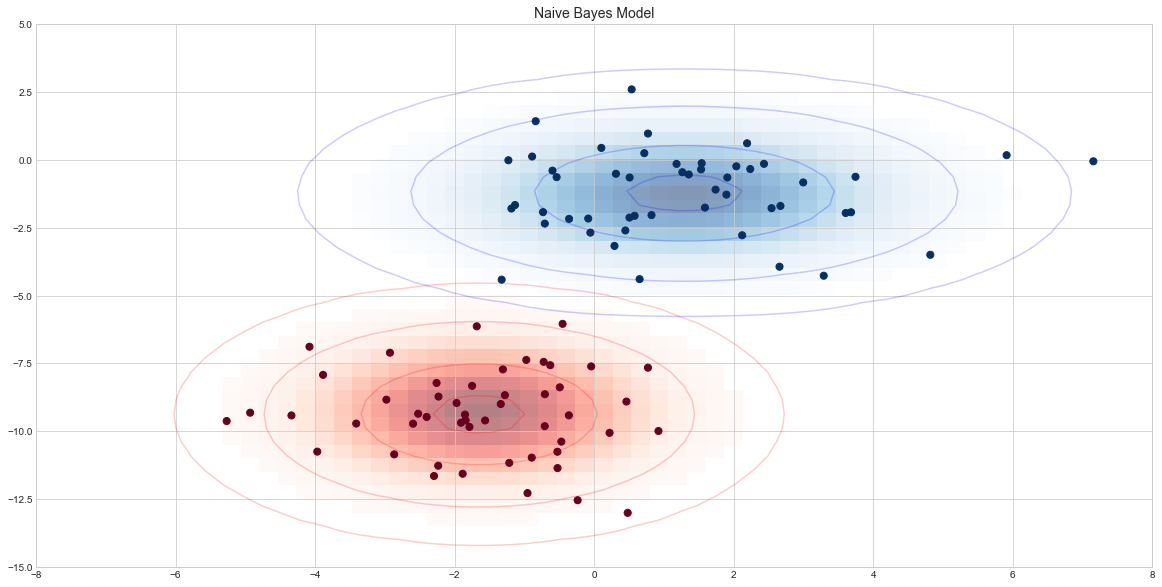

In [45]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

fig.savefig('gaussian_NB.png')

This plot illustrates two simulated Gaussian distributions.
Data are more condensed in the central.
Our goal in this section is to compute the prosterior probability 𝑃(features | 𝐿1)  of the data
and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

In [46]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X, y);

Now let's generate some test data and predict the label:

In [48]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = nb_model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

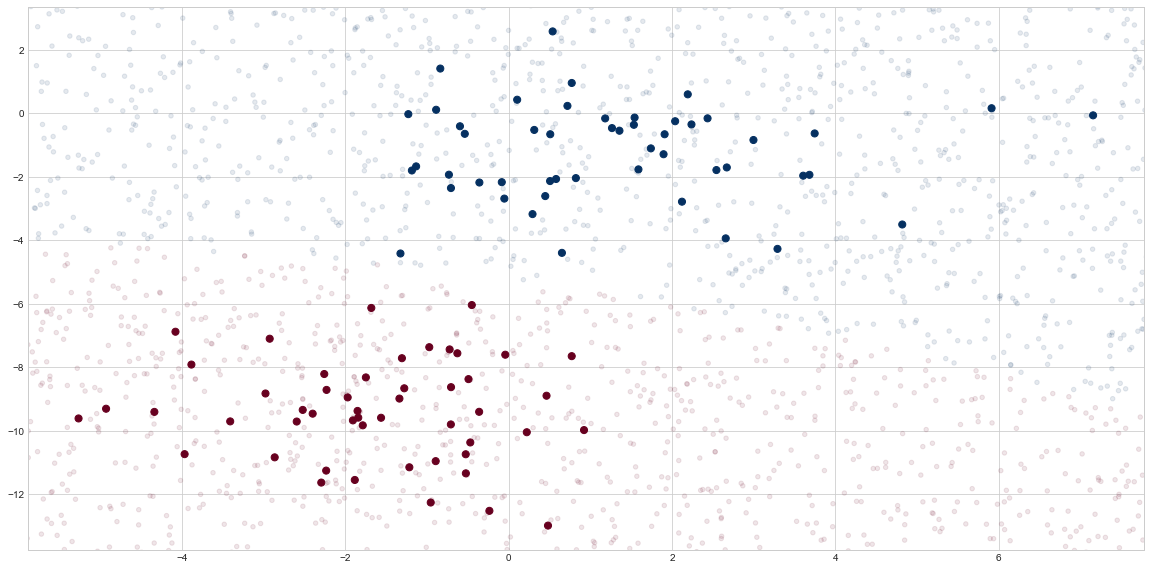

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

The boundary of the two classes is highly curved.
To call the probability of each predicted class:

Now we will implement the model on clinical data

In [56]:
nb_df = pd.read_csv("./data/NB_dataset.txt", delimiter=',')
nb_df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


Before feeding the data to the naive Bayes classifier model, we need to do some pre-processing.
Here, we’ll create the x and y variables by taking them from the dataset and using the train_test_split function of scikit-learn to split the data into training and test sets.

In [61]:
X = nb_df[["glucose", "bloodpressure"]]
y = nb_df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # Leave this line blank for exercise

In [64]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1])

**Model Evaluation**

Finally, we need to check to see how well our model is performing on the test data. For this, we evaluate our model by finding the accuracy score produced by the model.

In [67]:
accuracy = accuracy_score(y_pred, y_test)*100
accuracy

90.95477386934674